In [7]:
import nengo
import nengo_extras
from nengo_extras.gui import image_function, image_display_function
from nengo_extras.matplotlib import imshow
import nengo_extras
from PIL import Image
import numpy as np

In [2]:
image = Image.open("small.jpg")

print(image.bits, image.size, image.format)
print(image.size + (3,))
18048

from scipy.misc import imread
img = imread("small.jpg")

# order must be (channel, height, width)
img = np.transpose(img, (2,0,1))

# flatten image into a single vector
X = img.flatten()

# normalize image between 0 and 1
X = 1.0 * X / np.max(X)

print('Xshape = {}'.format(X.shape))
print(X)

(8, (350, 300), 'JPEG')
(350, 300, 3)
Xshape = (315000,)
[1.         1.         1.         ... 1.         1.         0.99607843]


/home/turtlebot/.virtualenvs/turtlebot/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


/home/turtlebot/.virtualenvs/turtlebot/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


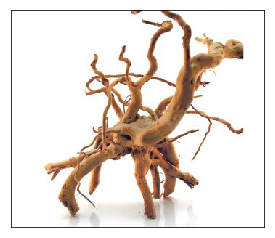

In [9]:
model = nengo.Network('Images')
with model:
    u = nengo.Node(X)
    #u = nengo.Node(nengo.processes.PresentInput([X], 0.1))
    display_f = image_display_function((3, 300, 350)) # set size to be (channel, height, width)
    #display_f = image_display_function(image.size + (3,))
    display_node = nengo.Node(display_f, size_in=u.size_out)
    nengo.Connection(u, display_node, synapse=None)
    
imshow(imread("small.jpg"))

In [4]:
# View Model
from nengo_gui.ipython import IPythonViz
IPythonViz(model)